## **Comparing Logistic Regression and Decision Trees for Diabetes Prediction: An In-depth Evaluation of Performance and Interpretability**

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import files

import plotly.graph_objects as go

plt.style.use('dark_background')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#upload the data file
uploadFile = files.upload()
df = pd.read_csv('diabetes_prediction_dataset.csv')

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#Get the gender count of the data set
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
#Get smoking count of the data set
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

**Data Cleaning**
---



---



In [ ]:
#Check for Duplicate Data
df_duplicate = df[df.duplicated()]
df_duplicate.shape

(3854, 9)

In [ ]:
#Drop Duplicate
df = df.drop_duplicates()

In [ ]:
df.shape

(96146, 9)

In [ ]:
#replace 'smoking_history' values
df['smoking_history'].replace(['No Info'], 'never', inplace=True)
df['smoking_history'].replace(['former', 'not current'], 'past', inplace=True)
df['smoking_history'].replace('ever', 'current', inplace=True)

In [ ]:
df.smoking_history.value_counts()

never      67285
past       15666
current    13195
Name: smoking_history, dtype: int64

In [ ]:
#replace smoking history values
df['smoking_history'].replace(['never', 'past', 'current'], [0, 1, 2], inplace=True)

In [ ]:
#smoking history count
df.smoking_history.value_counts()

0    67285
1    15666
2    13195
Name: smoking_history, dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,2,23.45,5.0,155,0
4,Male,76.0,1,1,2,20.14,4.8,155,0


In [ ]:
#visualize the genders
df.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
#Remove other value from gender
df = df[df.gender.str.contains('Other') == False]

In [ ]:
#visualize the genders
df.gender.value_counts()

Female    56161
Male      39967
Name: gender, dtype: int64

In [ ]:
#Replace male and female to 0 and 1
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

In [ ]:
#visualize the genders
df.gender.value_counts()

1    56161
0    39967
Name: gender, dtype: int64

In [ ]:
#Separate dataset between genders
males_df = df[df['gender'] == 0]
females_df = df[df['gender'] == 1]

In [ ]:
males_df.shape

(39967, 9)

In [ ]:
females_df.shape

(56161, 9)

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,0,24.60,4.8,145,0
99996,1,2.0,0,0,0,17.37,6.5,100,0
99997,0,66.0,0,0,1,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


**Data Visualization**

---



<Axes: xlabel='gender', ylabel='count'>

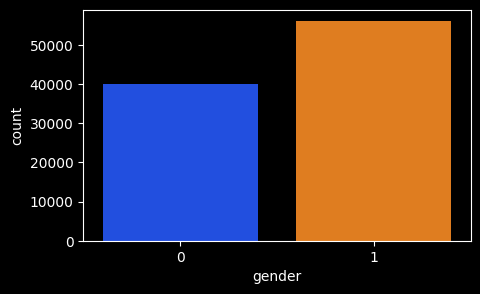

In [ ]:
#Vizualization
#Males - 0
#Females - 1
fig = plt.figure(figsize=(5,3))
sns.countplot(x='gender', data=df, palette='bright')

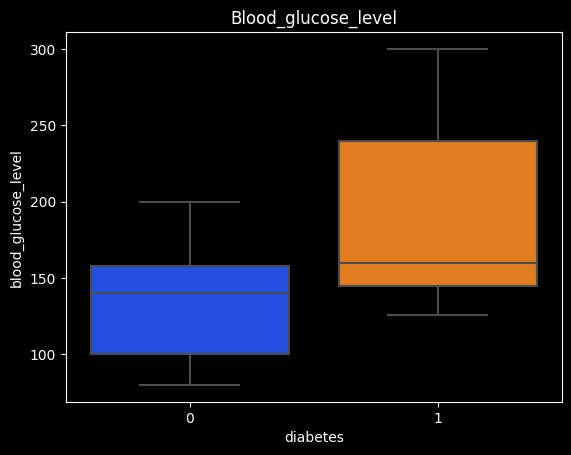

In [ ]:
#Box plot Visualization
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df , palette='bright')
plt.title('Blood_glucose_level')
plt.show()

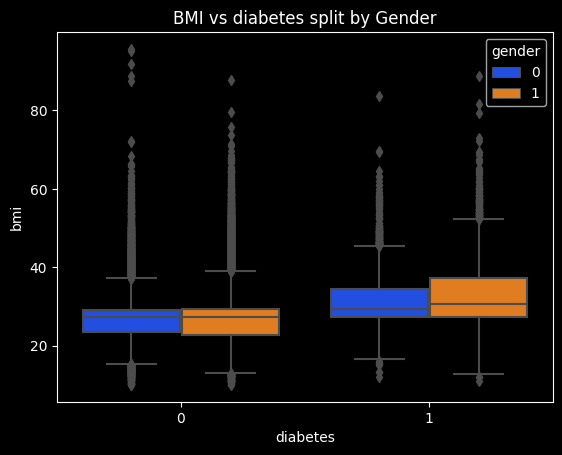

In [ ]:
#split by gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df, palette='bright')
plt.title('BMI vs diabetes')
plt.show()

<Axes: >

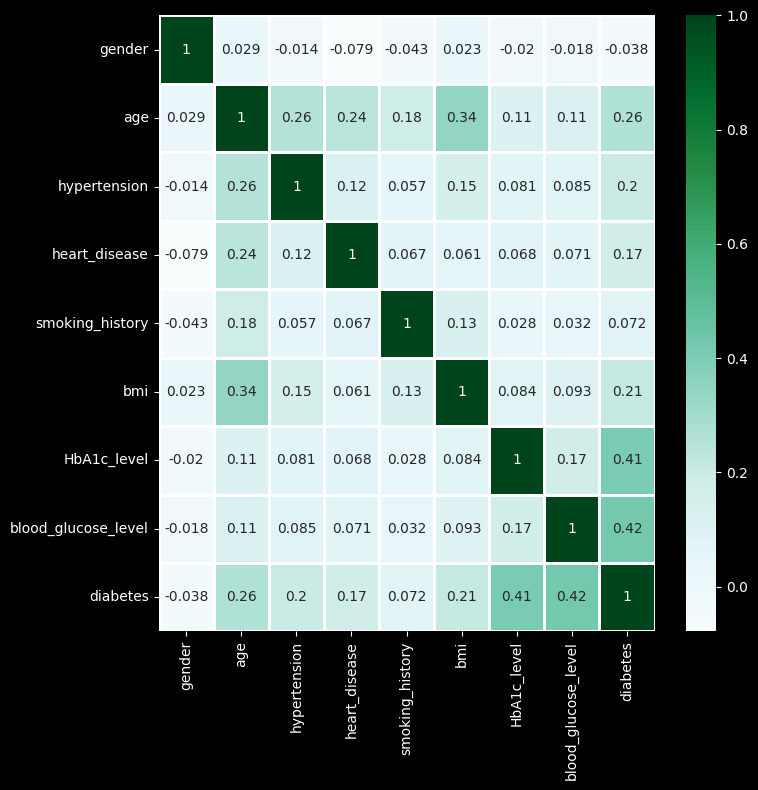

In [ ]:
#HeatMap Males, Females included
fig = plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="BuGn", linewidths=1)

<Axes: >

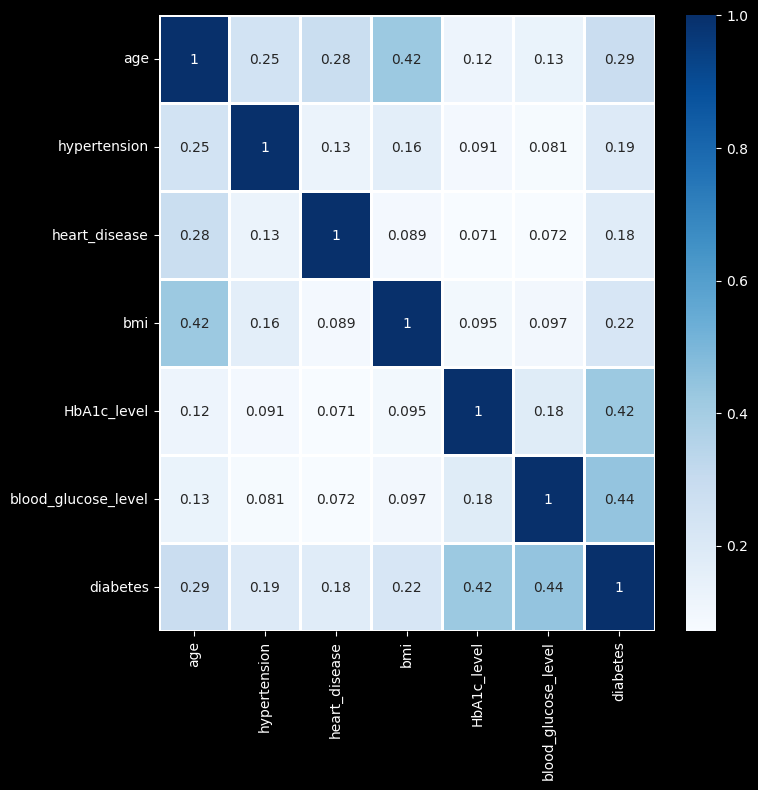

In [ ]:
#HeatMap Males
fig = plt.figure(figsize=(8,8))

males_HeatMap = males_df.drop(['gender', 'smoking_history'],axis=1)

sns.heatmap(males_HeatMap.corr(), annot=True, cmap="Blues", linewidths=1)

<Axes: >

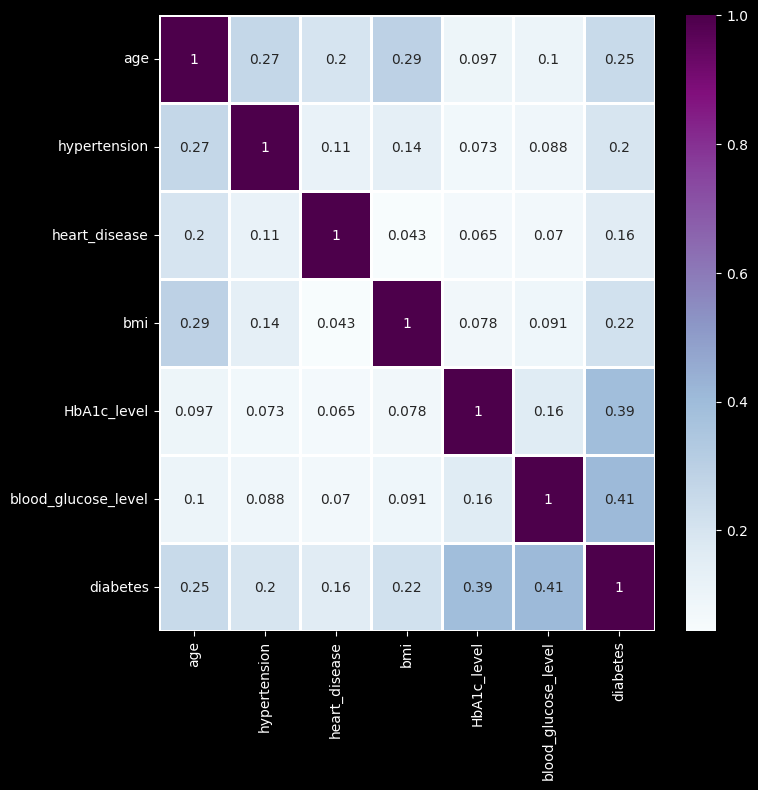

In [ ]:
#HeatMap Females
fig = plt.figure(figsize=(8,8))

females_HeatMap = females_df.drop(['gender', 'smoking_history'],axis=1)

sns.heatmap(females_HeatMap.corr(), annot=True, cmap="BuPu", linewidths=1)

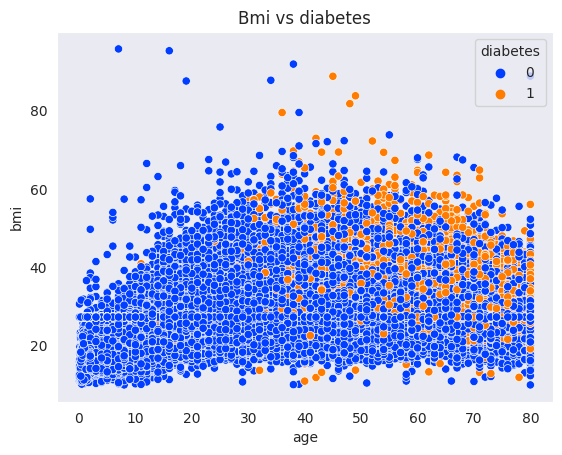

In [ ]:
#scatterplot split by gender
import seaborn as sns
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df,palette='bright')
plt.title('Bmi vs diabetes')
plt.show()

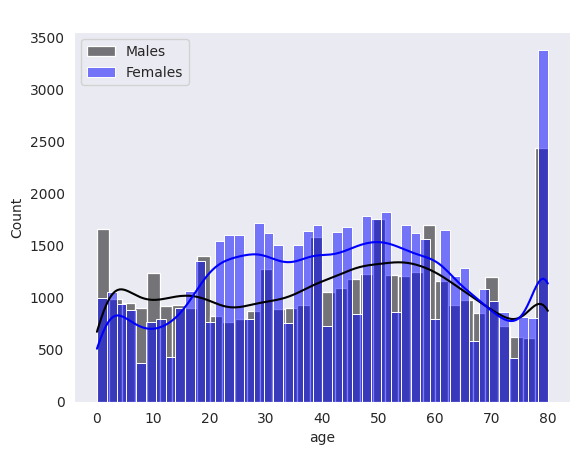

In [ ]:
#histogram - age
sns.set_palette("colorblind")
sns.set_style("dark")
plt.figure(facecolor='white')
sns.histplot(x="age", data=males_df, kde=True, color="black", label="Males")
sns.histplot(x="age", data=females_df, kde=True, color="blue", label="Females")
plt.title("Age Distribution - Males vs Females", color="white")
plt.legend()
plt.show()

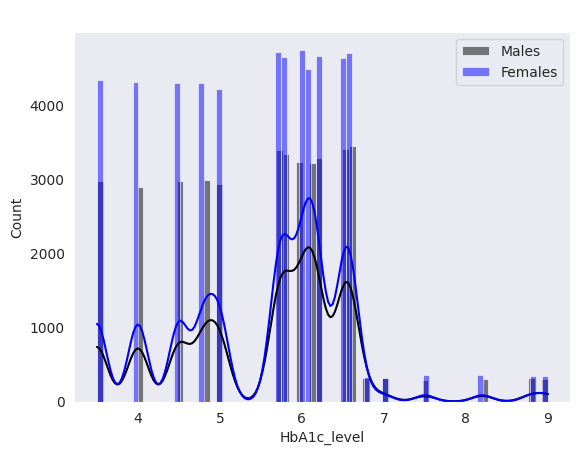

In [ ]:
#histogram - Hba1c_levels
sns.set_palette("colorblind")
sns.set_style("dark")
plt.figure(facecolor='white')
sns.histplot(x="HbA1c_level", data=males_df, kde=True, color="black", label="Males")
sns.histplot(x="HbA1c_level", data=females_df, kde=True, color="blue", label="Females")
plt.title("HbA1c Level Distribution - Males vs Females", color="white")
plt.legend()
plt.show()

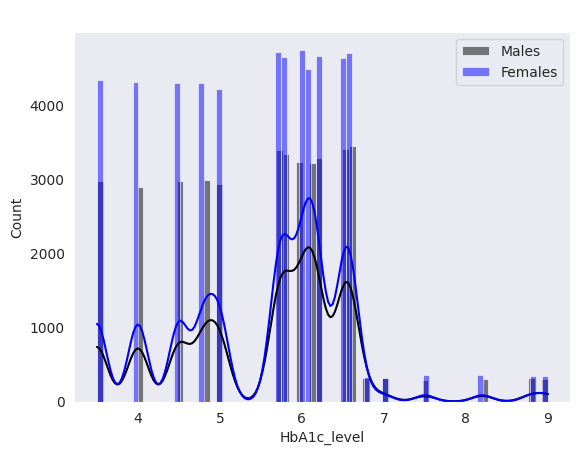

In [ ]:
sns.set_palette("colorblind")
sns.set_style("dark")
plt.figure(facecolor='white')
sns.histplot(x="HbA1c_level", data=males_df, kde=True, color="black", label="Males")
sns.histplot(x="HbA1c_level", data=females_df, kde=True, color="blue", label="Females")
plt.title("HbA1c Level Distribution - Males vs Females", color="white")
plt.legend()
plt.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=males_df['age'], name='Male', marker_color='blue', boxpoints='all', whiskerwidth=0.3))
fig.add_trace(go.Box(y=females_df['age'], name='Females', marker_color='pink', boxpoints='all', whiskerwidth=0.3))
fig.update_layout(template='plotly_dark', title='Age Distribution', height=600)

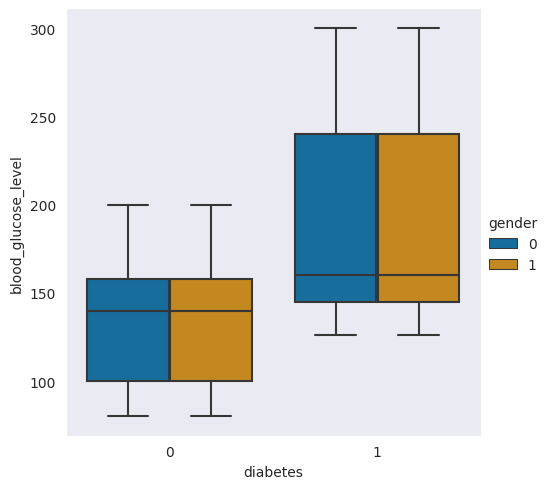

In [ ]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

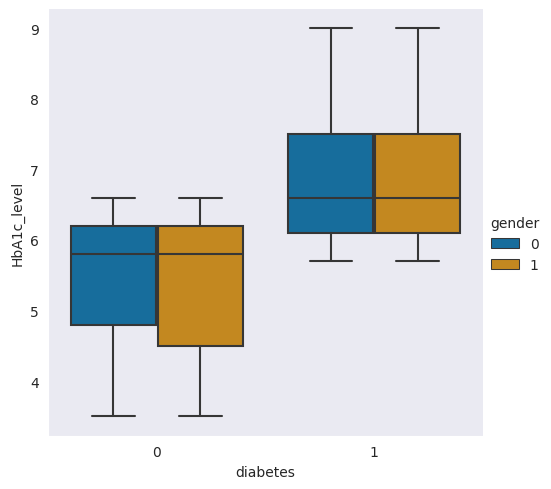

In [ ]:
sns.catplot(data = df, x = 'diabetes', y = 'HbA1c_level', kind = 'box', hue = 'gender')
plt.show()

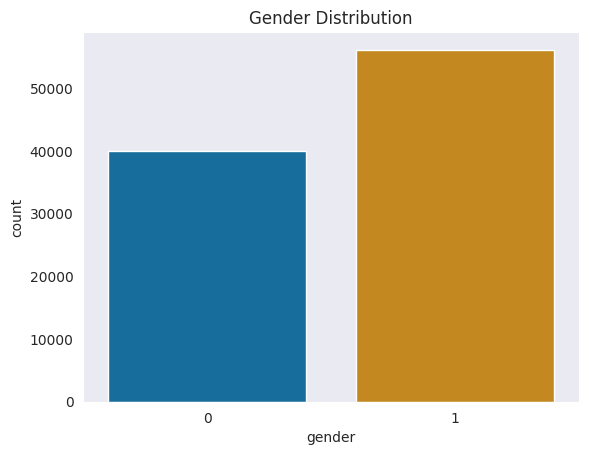

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['No Diabetes', 'Diabetes'], values=df['diabetes'].value_counts(), hole=.2,)])
fig

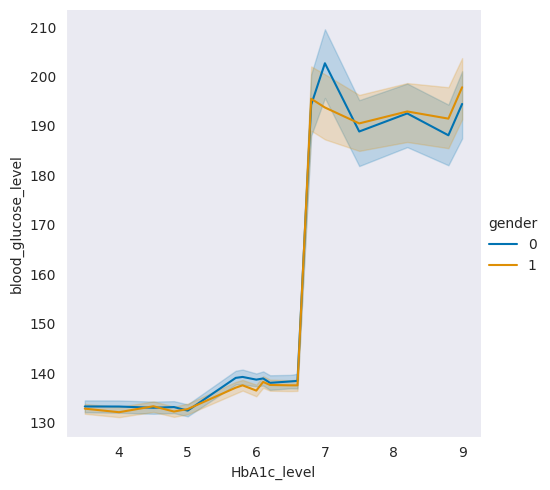

In [ ]:
sns.relplot(data = df, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', markers = True)
plt.show()

**Model**

---

**Logistic Regression - Both Male and Female**


In [ ]:
#machine learning
#seperate x and y variable into 2 sets
x = df.iloc[:,:8]
y = df['diabetes']
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,0,25.19,6.6,140
1,1,54.0,0,0,0,27.32,6.6,80
2,0,28.0,0,0,0,27.32,5.7,158
3,1,36.0,0,0,2,23.45,5.0,155
4,0,76.0,1,1,2,20.14,4.8,155


In [ ]:
#Split data into a training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.shape

(67289, 8)

In [ ]:
x_test.shape

(28839, 8)

In [ ]:
y_train.shape

(67289,)

In [ ]:
y_test.shape

(28839,)

In [ ]:
#Logistic Regression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

28940    0
12116    0
93980    1
3983     1
84813    0
        ..
50175    0
91095    0
14390    0
6108     0
18455    0
Name: diabetes, Length: 28839, dtype: int64

In [ ]:
confusion_matrix(y_test, y_pred)

array([[25825,   460],
       [ 1010,  1544]])

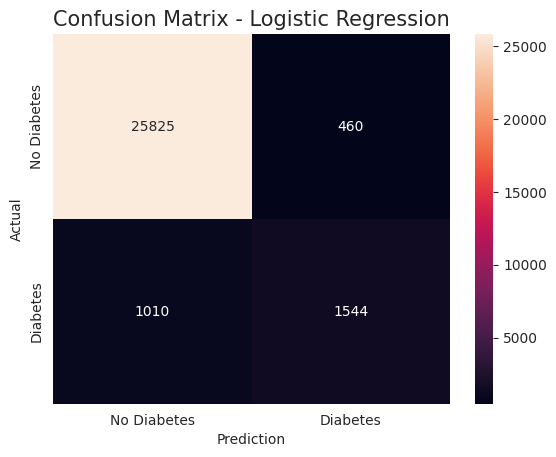

In [ ]:
cm = confusion_matrix(y_test, y_pred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Logistic Regression', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
#accuracy score
logis_accuracy = model.score(x_test, y_test)
logis_accuracy

0.9490273587849787

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     26285
           1       0.77      0.60      0.68      2554

    accuracy                           0.95     28839
   macro avg       0.87      0.79      0.82     28839
weighted avg       0.95      0.95      0.95     28839



***Prediction of a single person***

In [ ]:
#[gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level]
model.predict(np.array([[	1, 80.0, 0, 1, 0, 25.19, 6.6, 140]]))[0]

1

**Logistic Regression - Male**

In [ ]:
#machine learning
#seperate x and y variable into 2 sets

male_x = males_df.iloc[:,:8]
male_y = males_df['diabetes']

In [ ]:
male_x_train, male_x_test, male_y_train, male_y_test = train_test_split(male_x, male_y, test_size=0.3)

In [ ]:
male_x_train.shape

(27976, 8)

In [ ]:
male_x_test.shape

(11991, 8)

In [ ]:
male_y_train.shape

(27976,)

In [ ]:
male_y_test.shape

(11991,)

In [ ]:
#LogisticRegression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(male_x_train, male_y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
male_y_pred = model.predict(male_x_test)

In [ ]:
male_y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
male_y_test

46322    0
74775    0
52019    0
28087    0
18010    0
        ..
59055    0
9904     0
66201    0
72081    0
20035    1
Name: diabetes, Length: 11991, dtype: int64

In [ ]:
#accuary score
logis_male_accuracy = model.score(male_x_test, male_y_test)
logis_male_accuracy

0.947794178967559

In [ ]:
confusion_matrix(male_y_test, male_y_pred)

array([[10621,   168],
       [  458,   744]])

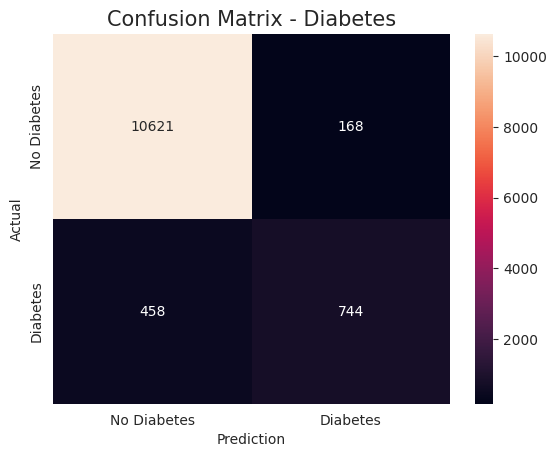

In [ ]:
cm = confusion_matrix(male_y_test, male_y_pred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Diabetes', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(male_y_test, male_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10789
           1       0.82      0.62      0.70      1202

    accuracy                           0.95     11991
   macro avg       0.89      0.80      0.84     11991
weighted avg       0.94      0.95      0.94     11991



**Logistic Regression - Female**

In [ ]:
fem_x = females_df.iloc[:,:8]
fem_y = females_df['diabetes']

In [ ]:
fem_x_train, fem_x_test, fem_y_train, fem_y_test = train_test_split(fem_x, fem_y, test_size=0.2)

In [ ]:
fem_x_train.shape

(44928, 8)

In [ ]:
fem_x_test.shape

(11233, 8)

In [ ]:
fem_y_train.shape

(44928,)

In [ ]:
fem_y_test.shape

(11233,)

In [ ]:
#LogisticRegression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(fem_x_train, fem_y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
fem_y_pred = model.predict(fem_x_test)

In [ ]:
fem_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fem_y_test

41791    0
14345    0
17666    0
18358    0
4681     0
        ..
4709     0
37321    0
57557    0
22542    0
38928    0
Name: diabetes, Length: 11233, dtype: int64

In [ ]:
#accuary score
logis_female_accuracy = model.score(fem_x_test, fem_y_test)
logis_female_accuracy

0.9626991898869403

In [ ]:
confusion_matrix(fem_y_test, fem_y_pred)

array([[10282,    72],
       [  347,   532]])

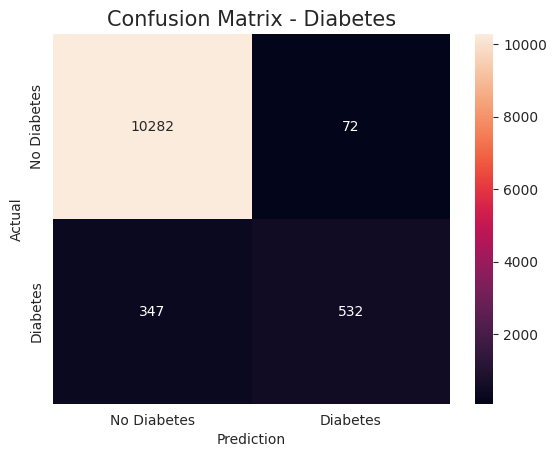

In [ ]:
cm = confusion_matrix(fem_y_test, fem_y_pred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Diabetes', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(fem_y_test, fem_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10354
           1       0.88      0.61      0.72       879

    accuracy                           0.96     11233
   macro avg       0.92      0.80      0.85     11233
weighted avg       0.96      0.96      0.96     11233



In [ ]:
print('Logistic Regression Accuracy -')
print(f'Both Male and Female Accuracy: {logis_accuracy}')
print(f'Male Accuracy: {logis_male_accuracy}')
print(f'Female Accuracy: {logis_female_accuracy}')

Logistic Regression Accuracy -
Both Male and Female Accuracy: 0.9490273587849787
Male Accuracy: 0.947794178967559
Female Accuracy: 0.9626991898869403


**Decision Tree - Males and Females**

---



In [ ]:
#DecisionTree
#Split the data into training and testing datasets

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3)

In [ ]:
#shapes
xTrain.shape

(67289, 8)

In [ ]:
yTrain.shape

(67289,)

In [ ]:
xTest.shape

(28839, 8)

In [ ]:
yTest.shape

(28839,)

In [ ]:
#Build a random descision tree. Using a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Do predictions with decision tree using the testing data
yTestPred = decTree.predict(xTest)

In [ ]:
#Evaluate the model
print('Confusion Matrix for Testing Data')
print(confusion_matrix(yTest, yTestPred))

Confusion Matrix for Testing Data
[[26285     0]
 [  805  1749]]


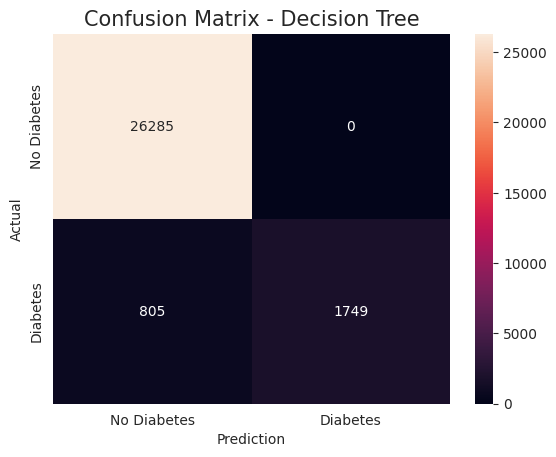

In [ ]:
cm = confusion_matrix(yTest, yTestPred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Decision Tree', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(yTest, yTestPred)
accuracy

0.9720864107632026

In [ ]:
#classifation report for testing data
print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26285
           1       1.00      0.68      0.81      2554

    accuracy                           0.97     28839
   macro avg       0.99      0.84      0.90     28839
weighted avg       0.97      0.97      0.97     28839



[Text(0.6666666666666666, 0.875, 'HbA1c_level <= 6.7\ngini = 0.161\nsamples = 67289\nvalue = [61361, 5928]\nclass = Low_risk'),
 Text(0.5, 0.625, 'blood_glucose_level <= 210.0\ngini = 0.096\nsamples = 64614\nvalue = [61361, 3253]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'age <= 53.5\ngini = 0.061\nsamples = 63367\nvalue = [61361, 2006]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.025\nsamples = 43427\nvalue = [42870, 557]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.135\nsamples = 19940\nvalue = [18491, 1449]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1247\nvalue = [0, 1247]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2675\nvalue = [0, 2675]\nclass = High_Risk')]

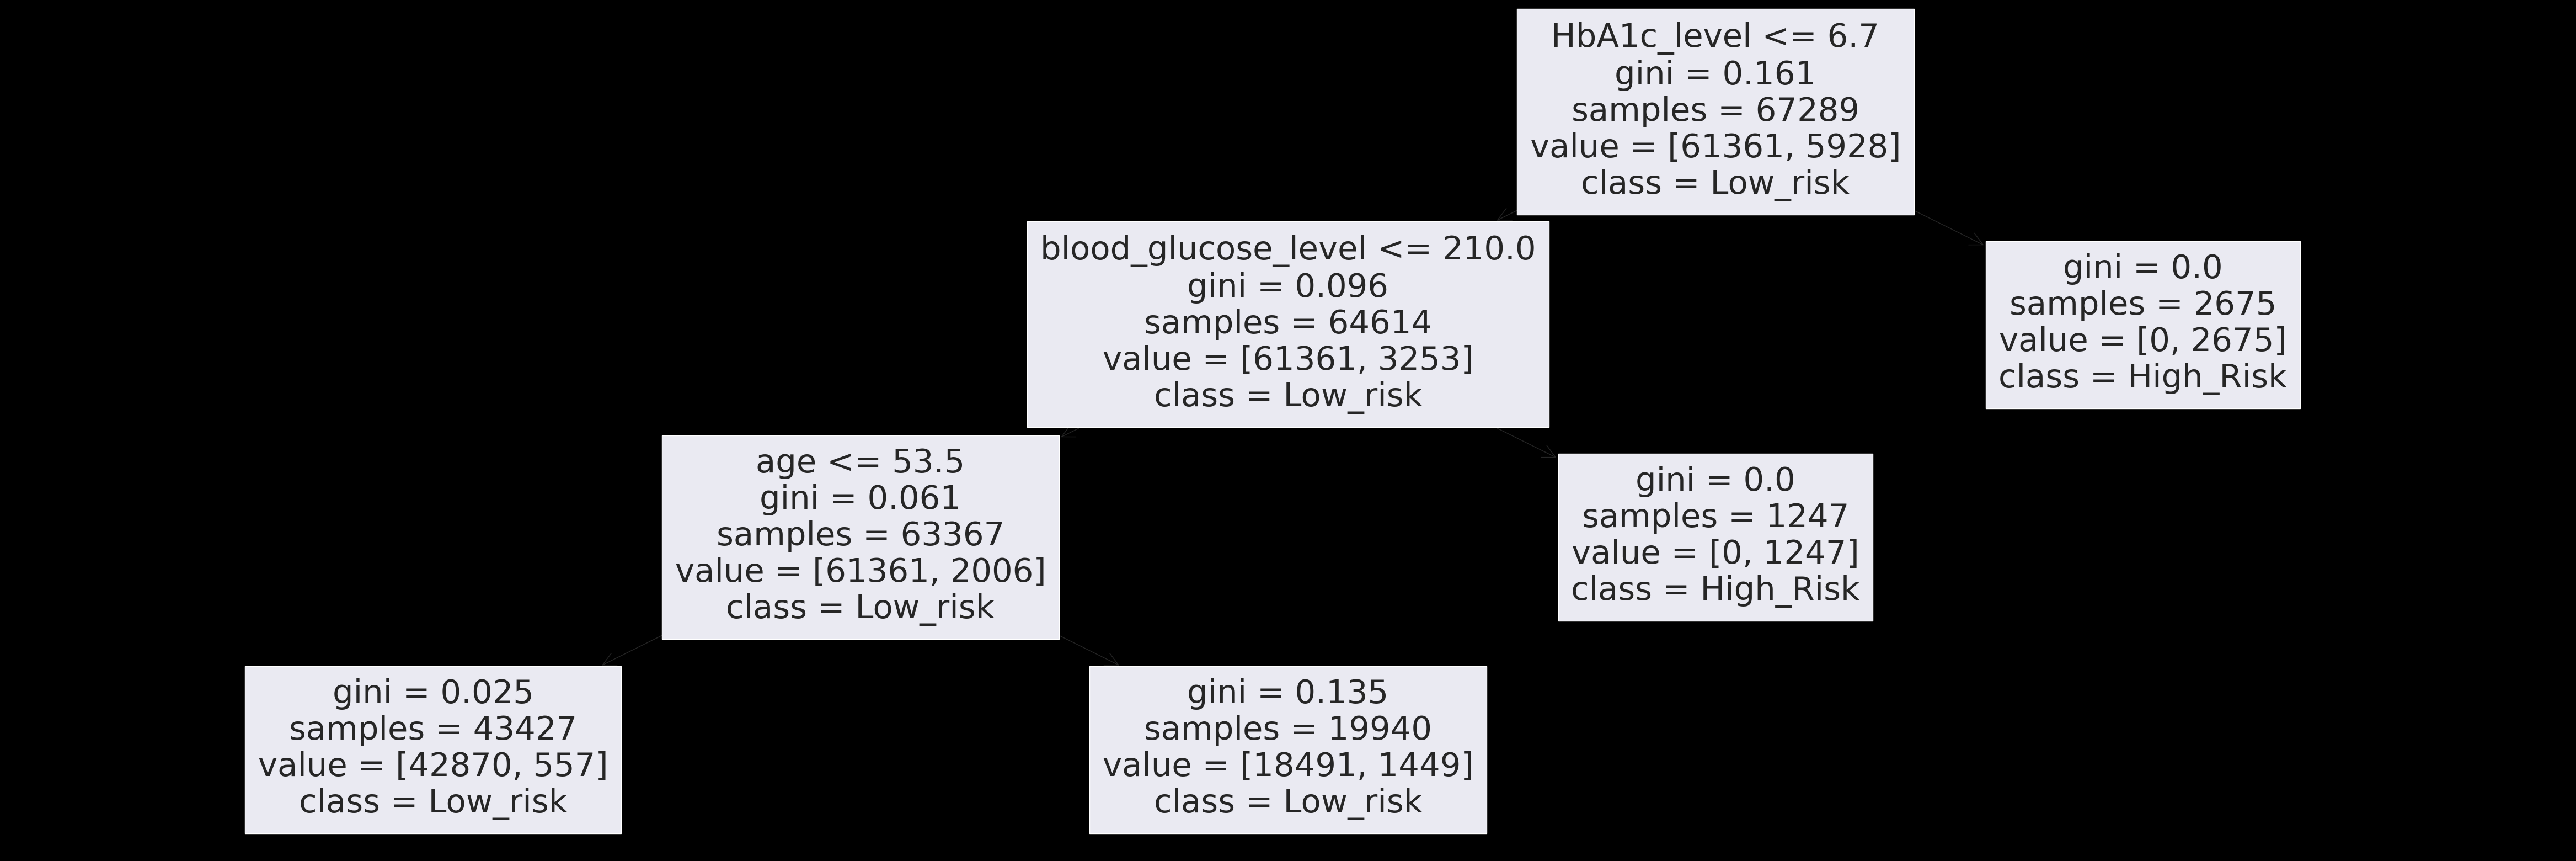

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60,  20),facecolor='black')
plot_tree(decTree, feature_names=x.columns, class_names=['Low_risk', 'High_Risk'])

**Decision Tree - Males**

In [ ]:
#DecisionTree
#Split the data into training and testing datasets
male_xTrain, male_xTest, male_yTrain, male_yTest = train_test_split(male_x, male_y, test_size=0.3)

In [ ]:
#shapes
male_xTrain.shape

(27976, 8)

In [ ]:
male_yTrain.shape

(27976,)

In [ ]:
male_xTest.shape

(11991, 8)

In [ ]:
male_yTest.shape

(11991,)

In [ ]:
#Build a random descision tree. Use a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(male_xTrain, male_yTrain)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'HbA1c_level <= 6.7\ngini = 0.18\nsamples = 27976\nvalue = [25176, 2800]\nclass = Low_risk'),
 Text(0.5, 0.625, 'blood_glucose_level <= 210.0\ngini = 0.108\nsamples = 26703\nvalue = [25176, 1527]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'age <= 50.5\ngini = 0.07\nsamples = 26124\nvalue = [25176, 948]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.024\nsamples = 16731\nvalue = [16530, 201]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.146\nsamples = 9393\nvalue = [8646, 747]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 579\nvalue = [0, 579]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1273\nvalue = [0, 1273]\nclass = High_Risk')]

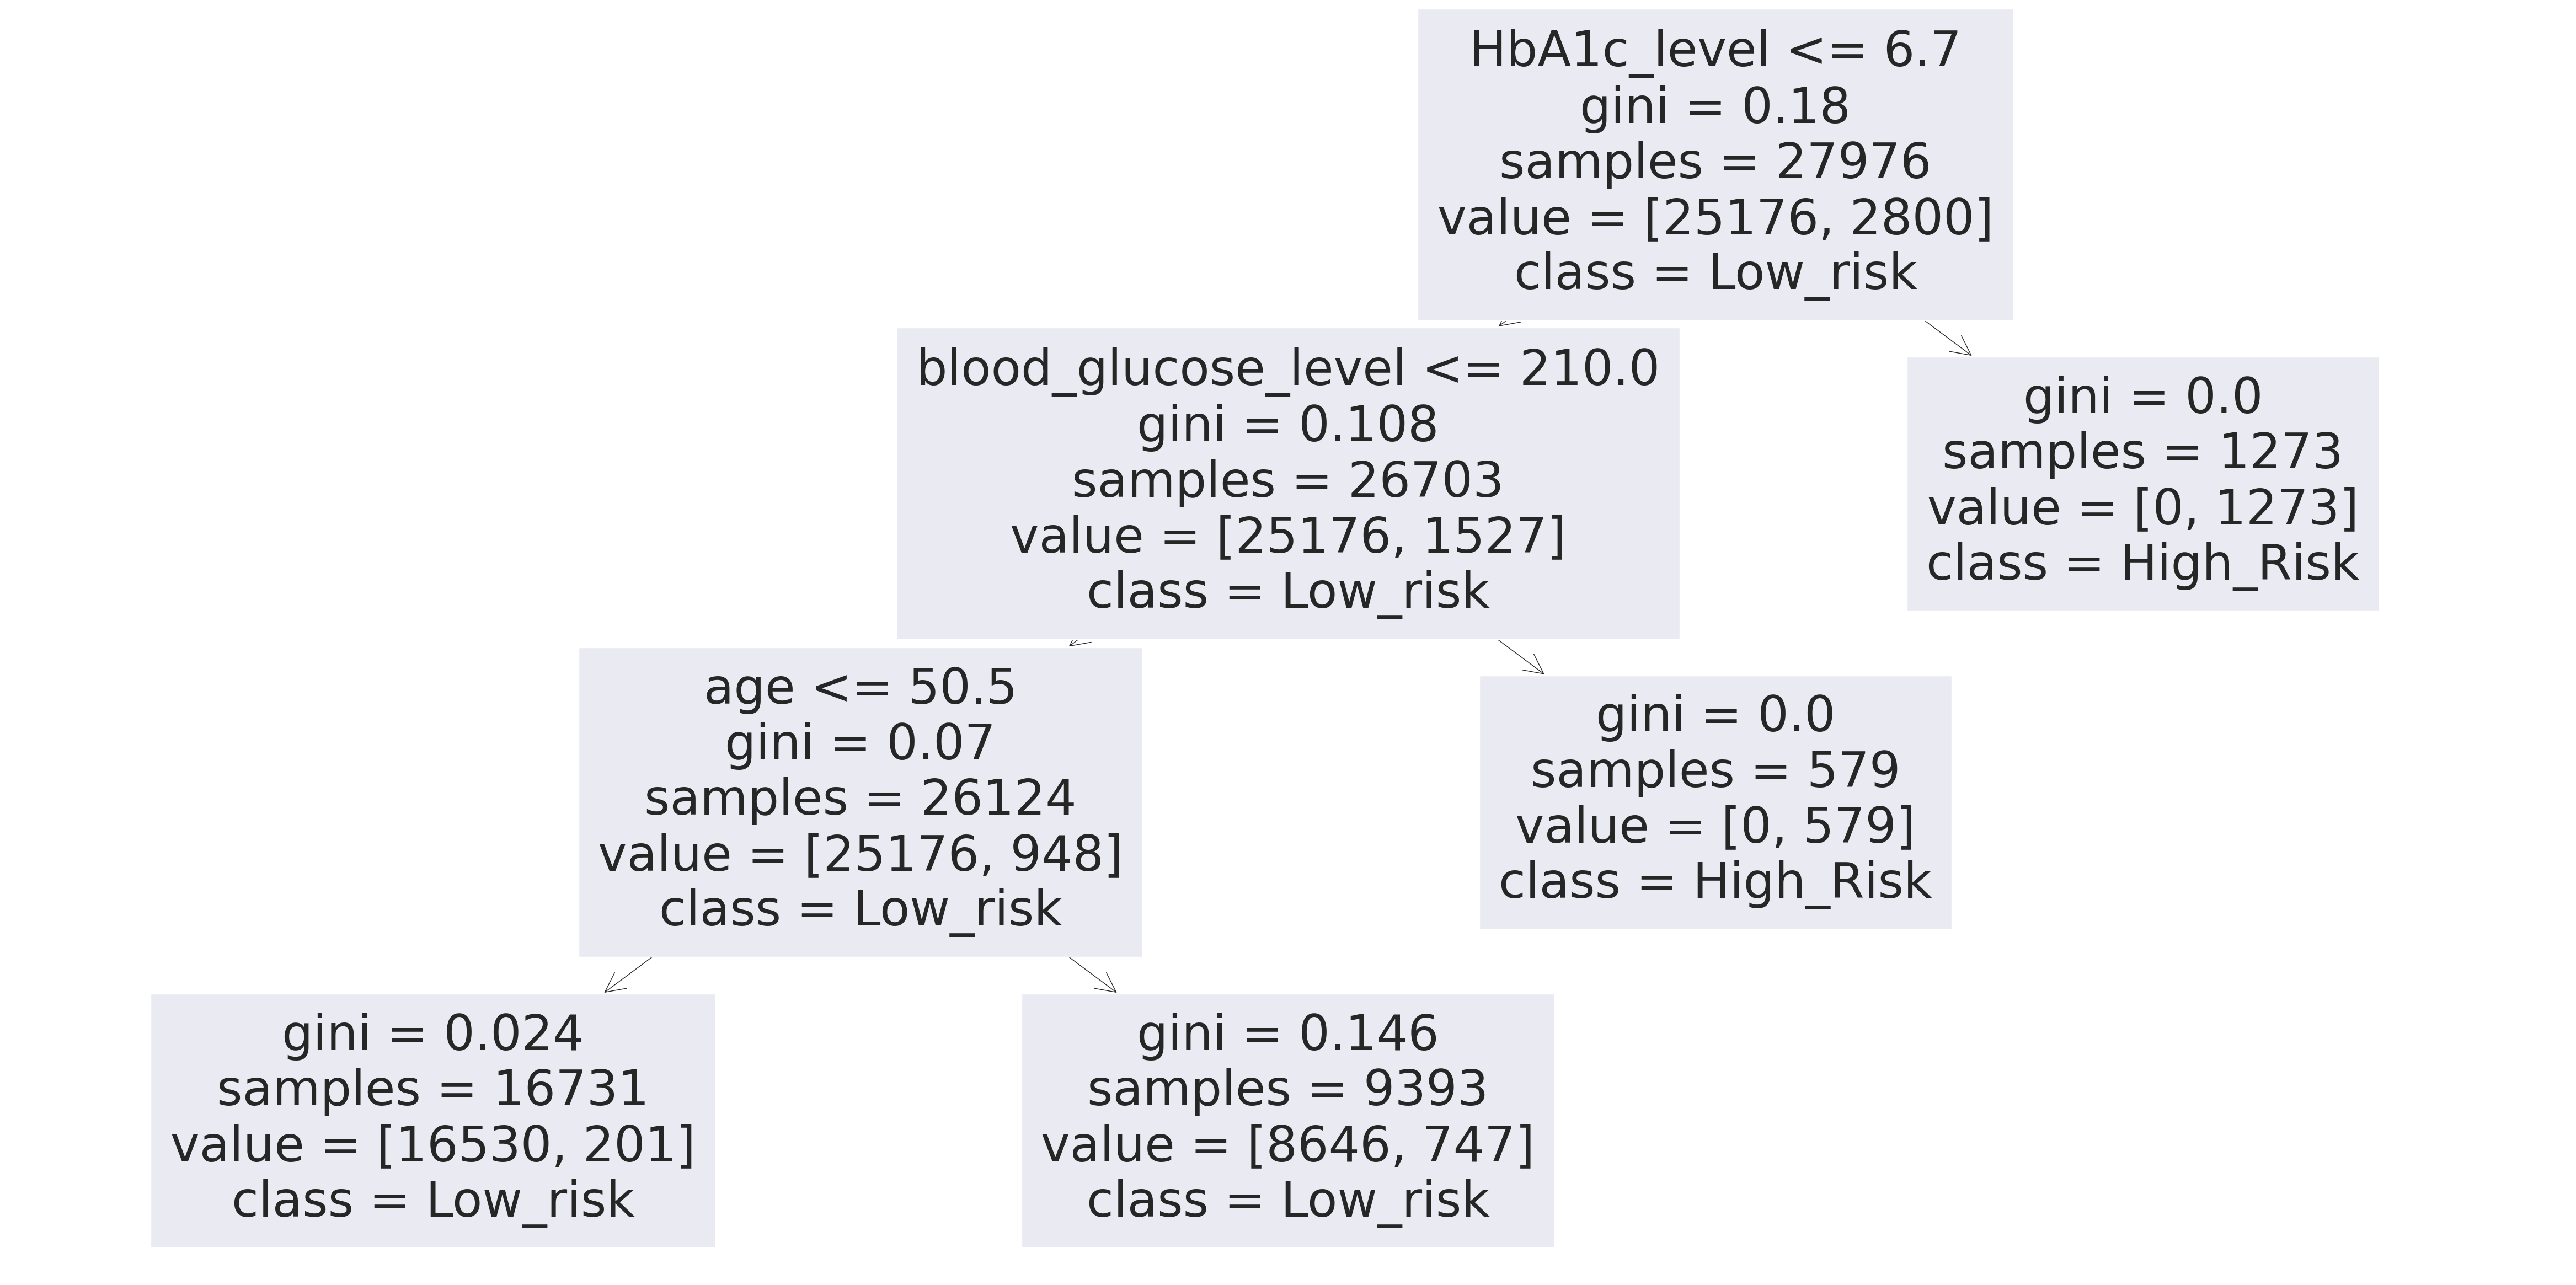

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60, 30))
plot_tree(decTree, feature_names=male_x.columns, class_names=['Low_risk', 'High_Risk'])

In [ ]:
#Do predictions with decision tree for testing data
male_yTestPred = decTree.predict(male_xTest)

In [ ]:
male_accuracy = accuracy_score(male_yTest, male_yTestPred)
male_accuracy

0.9663914602618631

In [ ]:
#Evaluate the model
print('Confusion Matrix for Testing Data')
print(confusion_matrix(male_yTest, male_yTestPred))

Confusion Matrix for Testing Data
[[10756     0]
 [  403   832]]


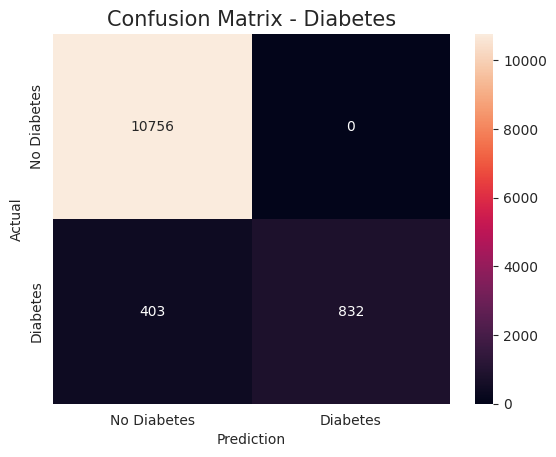

In [ ]:
cm = confusion_matrix(male_yTest, male_yTestPred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Diabetes', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
#classifation report for testing data
print(classification_report(male_yTest, male_yTestPred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10756
           1       1.00      0.67      0.81      1235

    accuracy                           0.97     11991
   macro avg       0.98      0.84      0.89     11991
weighted avg       0.97      0.97      0.96     11991



**Decision Tree - Females**

In [ ]:
#DecisionTree
#Split the data into training and testing datasets
fem_xTrain, fem_xTest, fem_yTrain, fem_yTest = train_test_split(fem_x, fem_y, test_size=0.3)

In [ ]:
#shapes
fem_xTrain.shape

(39312, 8)

In [ ]:
fem_yTrain.shape

(39312,)

In [ ]:
fem_xTest.shape

(16849, 8)

In [ ]:
fem_yTest.shape

(16849,)

In [ ]:
#Build a random descision tree. Use a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(fem_xTrain, fem_yTrain)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'HbA1c_level <= 6.7\ngini = 0.148\nsamples = 39312\nvalue = [36144, 3168]\nclass = Low_risk'),
 Text(0.5, 0.625, 'blood_glucose_level <= 210.0\ngini = 0.086\nsamples = 37843\nvalue = [36144, 1699]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'age <= 54.5\ngini = 0.053\nsamples = 37159\nvalue = [36144, 1015]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.023\nsamples = 26134\nvalue = [25830, 304]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.121\nsamples = 11025\nvalue = [10314, 711]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 684\nvalue = [0, 684]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1469\nvalue = [0, 1469]\nclass = High_Risk')]

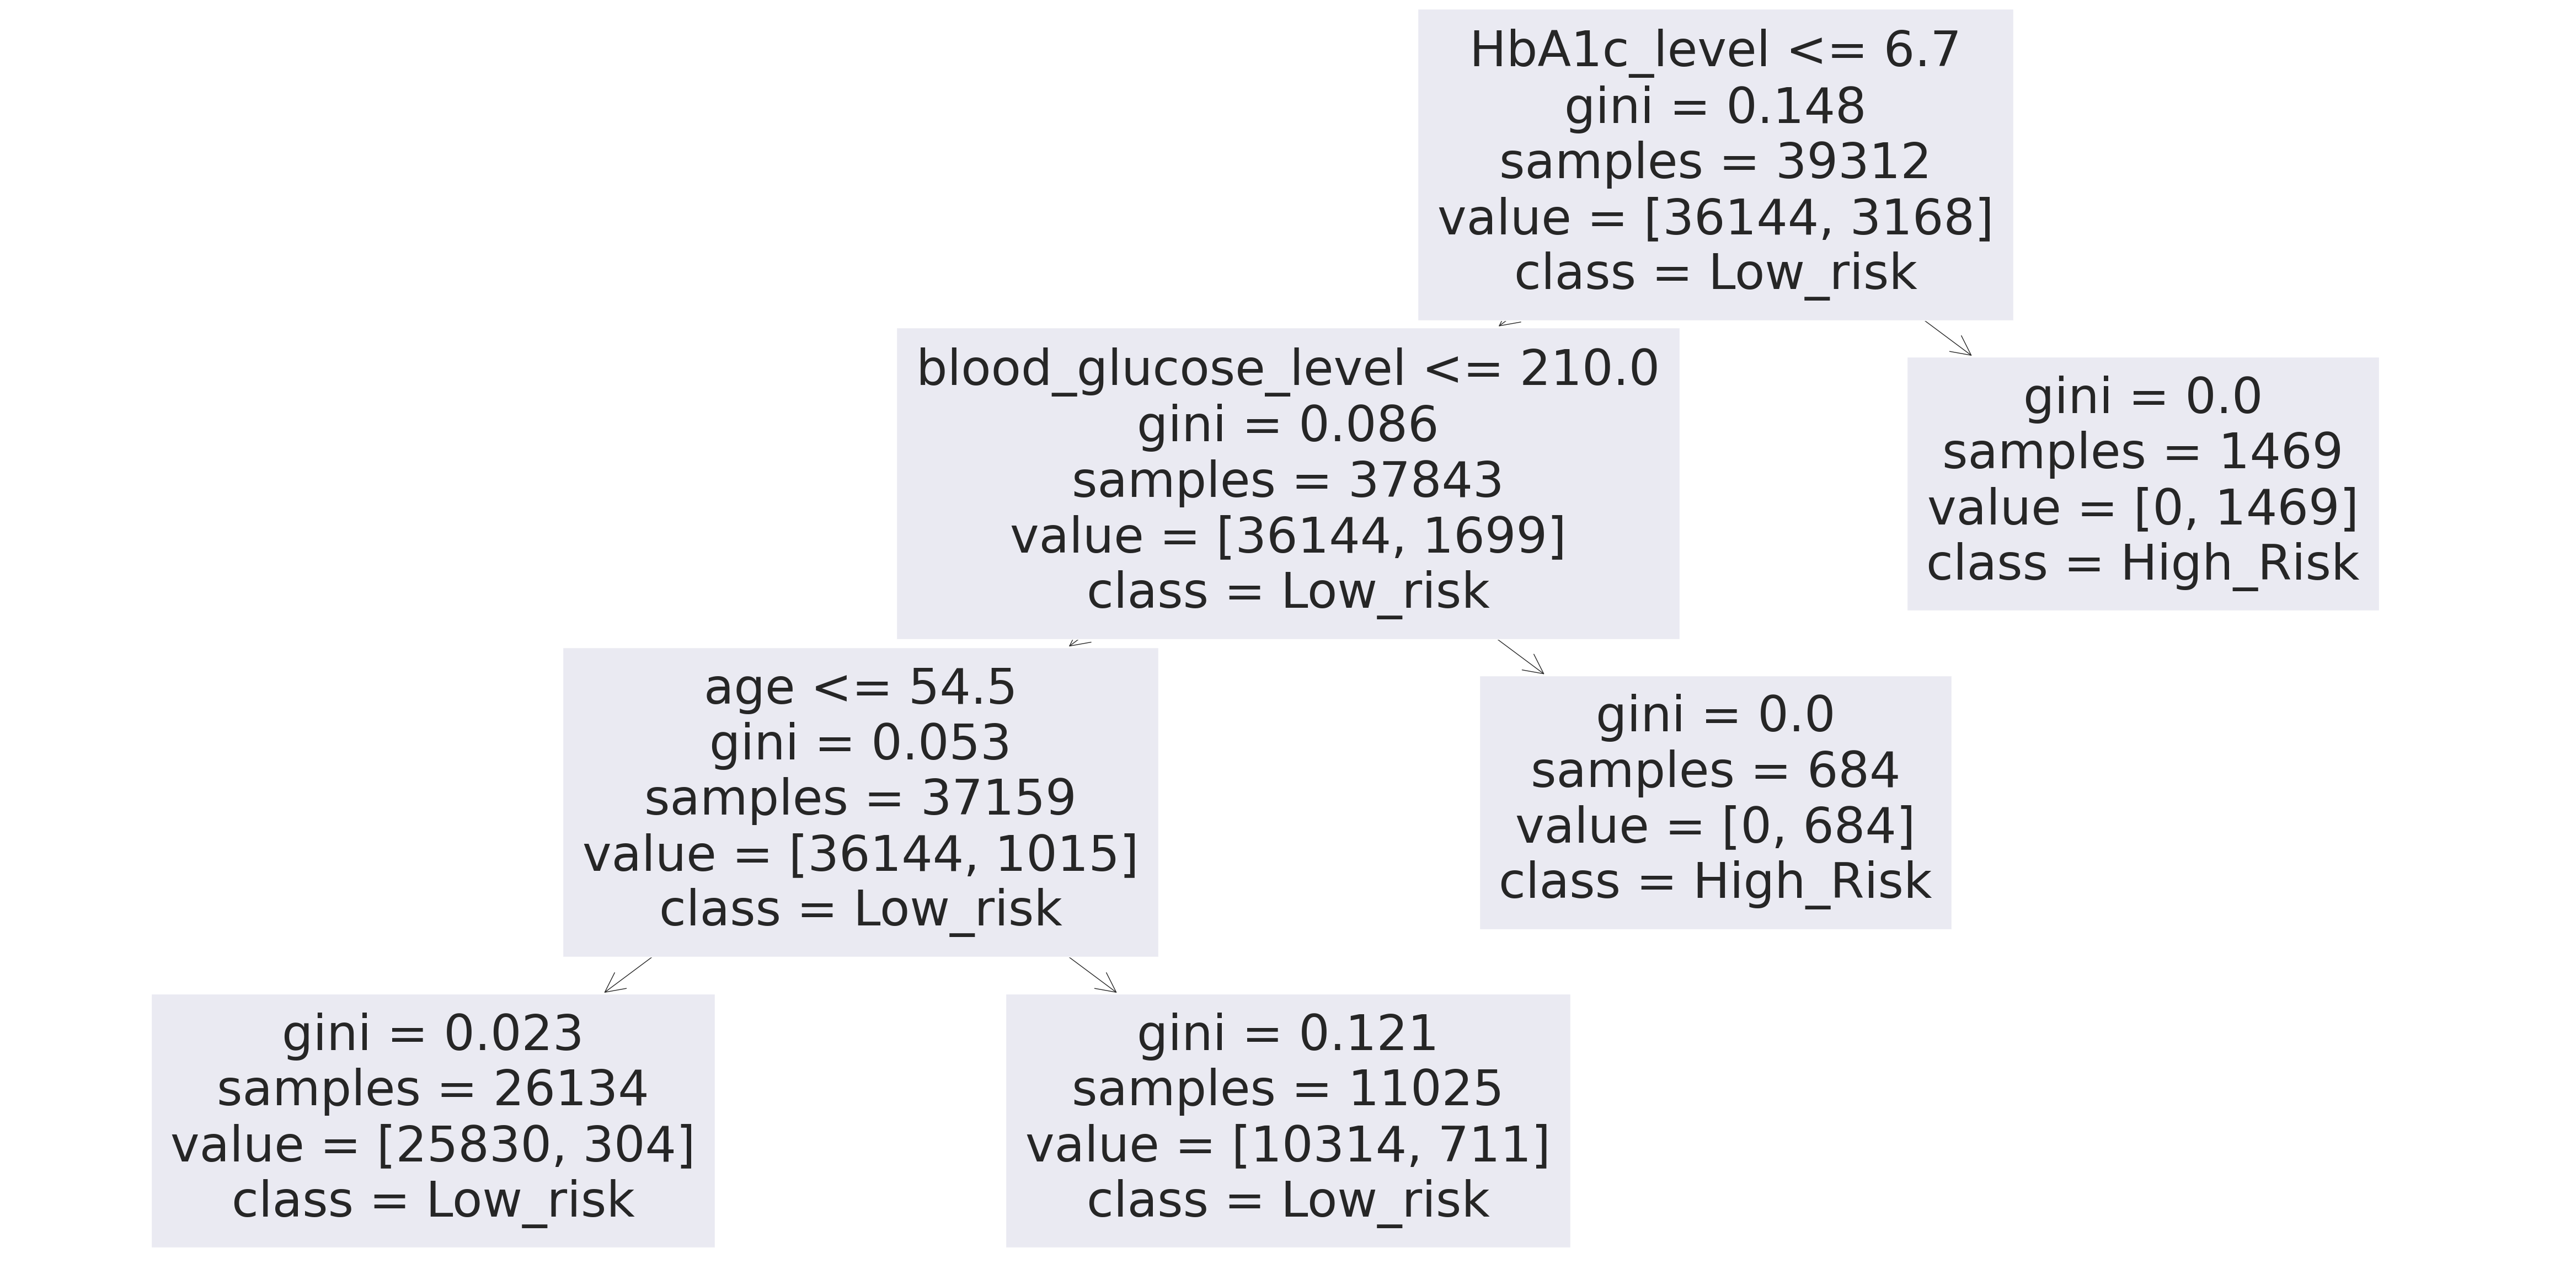

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60, 30))
plot_tree(decTree, feature_names=fem_x.columns, class_names=['Low_risk', 'High_Risk'])

In [ ]:
#Do predictions with and testing data
fem_yTestPred = decTree.predict(fem_xTest)

In [ ]:
female_accuracy = accuracy_score(fem_yTest, fem_yTestPred)
female_accuracy

0.9735889370289038

In [ ]:
#Evaluate the model
print('Confusion Matrix for Testing Data')
print(confusion_matrix(fem_yTest, fem_yTestPred))

Confusion Matrix for Testing Data
[[15570     0]
 [  445   834]]


In [ ]:
#classifation report for testing data
print(classification_report(fem_yTest, fem_yTestPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     15570
           1       1.00      0.65      0.79      1279

    accuracy                           0.97     16849
   macro avg       0.99      0.83      0.89     16849
weighted avg       0.97      0.97      0.97     16849



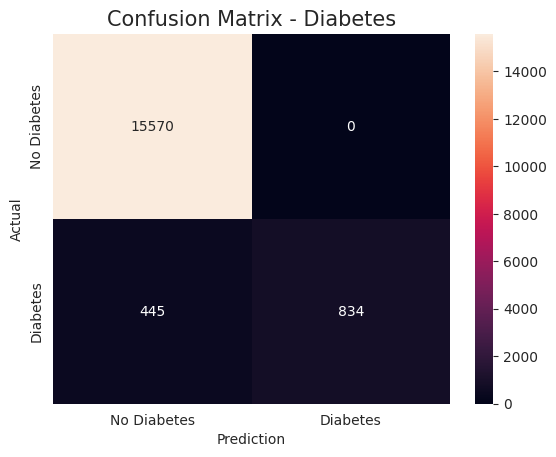

In [ ]:
cm = confusion_matrix(fem_yTest, fem_yTestPred)
class_label = ['No Diabetes', 'Diabetes']
dataCM = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(dataCM, annot=True, fmt=".5g")
plt.title('Confusion Matrix - Diabetes', fontsize=15)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
print('Decision Tree Accuracy -')
print(f'Both Male and Female Accuary: {accuracy}')
print(f'Male Accuary: {male_accuracy}')
print(f'Female Accuary: {female_accuracy}')

Decision Tree Accuracy -
Both Male and Female Accuary: 0.9720864107632026
Male Accuary: 0.9663914602618631
Female Accuary: 0.9735889370289038


In [ ]:
print('Logistic Regression Accuracy -')
print(f'Both Male and Female Accuracy: {logis_accuracy}')
print(f'Male Accuracy: {logis_male_accuracy}')
print(f'Female Accuracy: {logis_female_accuracy}')

Logistic Regression Accuracy -
Both Male and Female Accuracy: 0.9490273587849787
Male Accuracy: 0.947794178967559
Female Accuracy: 0.9626991898869403


Our findings showed that the independent variables HbA1c level and blood glucose level had the highest correlation to our dependent variable diabetes.​

Even after dividing our dataset by gender, this relation remain true. But men had a slightly higher HbA1c level and blood glucose level compared to women.​

We also noticed that the decision tree had a higher accuracy score compared to the logistic regression.



---
